# Installing necesary libs

In [1]:
!pip install -q gdown torchmetrics lpips torch-fidelity tqdm torchinfo loguru

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 3.8 MB/s eta 0:00:00


# Downloading needed Data

In [2]:
!gdown 1M_qtAZ0X7v97jZL3w6DM0zkXCcfztF-k #unet
!gdown 1K6JDi8l2QHYpHSmXZUYowEoFWAI60LYz #lama denoiser
!gdown 1MoOIfk4j-1jrRIVDYgpmv6I_IixUYJIz # final denoiser

!gdown 1m5dd3hd51p-EDHj05Pqsgspoiy5Gs6f_ # LAMA 36500
!gdown 1kUMW5pec4JVR0AKMkH49aoIOTGnnPmuP # MAT 0-17091
!gdown 154biIksdcBovAmEDvARfg5V1HPZQNZVP # MAT 17092-36500
!gdown 14-0t8X0pZBv_tyhs-PxNISdokKqO-aUN # MASKS 36500

Downloading...
From: https://drive.google.com/uc?id=1M_qtAZ0X7v97jZL3w6DM0zkXCcfztF-k
To: /content/till_now_best_unet.pth
100% 684k/684k [00:00<00:00, 114MB/s]
Downloading...
From: https://drive.google.com/uc?id=1K6JDi8l2QHYpHSmXZUYowEoFWAI60LYz
To: /content/till_now_best_denoising_lama.pth
100% 60.6k/60.6k [00:00<00:00, 63.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1MoOIfk4j-1jrRIVDYgpmv6I_IixUYJIz
To: /content/till_now_best_denosingin_final.pth
100% 60.6k/60.6k [00:00<00:00, 48.4MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1m5dd3hd51p-EDHj05Pqsgspoiy5Gs6f_
From (redirected): https://drive.google.com/uc?id=1m5dd3hd51p-EDHj05Pqsgspoiy5Gs6f_&confirm=t&uuid=a0d57828-3905-4777-92ca-80c4fcebb6bc
To: /content/lama_imgs_36500.zip
100% 548M/548M [00:05<00:00, 103MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1kUMW5pec4JVR0AKMkH49aoIOTGnnPmuP
From (redirected): https://drive.google.com/uc?id=1kUMW5pec4JVR0AKMkH49aoIOTGnnPmuP&confirm

# Unzipping Data

In [3]:
#making the unzip function
import zipfile
import os

def unzip_file(zip_path, extract_to):
    if not os.path.exists(extract_to):
        os.makedirs(extract_to)

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f'Extracted all files to {extract_to}')

In [4]:
#usng the unzip function
unzip_file("lama_imgs_36500.zip", "neww")
unzip_file("mat_imgs_17091.zip", "neww")
unzip_file("mat_images_17091_36500.zip", "neww")
unzip_file('masks (1).zip', 'neww')

Extracted all files to neww
Extracted all files to neww
Extracted all files to neww
Extracted all files to neww


# verifying Data size of MAT imgs

In [ ]:
print(len(os.listdir("neww/out_path_rg")))
print(len(os.listdir("neww/out_path")))

17055
19366


In [ ]:
print(len(os.listdir("neww/out_path_rg")) + len(os.listdir("neww/out_path")))

36421


# Combining data of both MAT folders

In [5]:
import os
import shutil

source = '/content/neww/out_path_rg/'
destination = '/content/neww/out_path/'

# gather all files
allfiles = os.listdir(source)

# iterate on all files to move them to destination folder
for f in allfiles:
	src_path = os.path.join(source, f)
	dst_path = os.path.join(destination, f)
	shutil.move(src_path, dst_path)


# Downloading complete dataset from Pytorch

In [6]:
# downloading the dataset
import torchvision

train = torchvision.datasets.Places365(root = "data/", split = 'val', small = True, download = True )
train

100%|██████████| 67.5M/67.5M [00:01<00:00, 34.2MB/s]
100%|██████████| 525M/525M [00:11<00:00, 47.6MB/s]


Dataset Places365
    Number of datapoints: 36500
    Root location: data/
    Split: val
    Small: True

# Removing bad dim imgs from dataset

In [7]:
# reoving the wrong files
from pathlib import Path
import os
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
from PIL import Image

path = Path("data/val_256/")

# if we will use train data then it would have folders many of diff objects while in validation set there is no such complicaion
# removing the improper images
count = 0
for i in os.listdir(path):
  img = plt.imread(path/i)
  if img.shape[-1] != 3:
    os.remove(path/i)
    count += 1

print(f"Deleted images with incorrect number of dims : {count}")

Deleted images with incorrect number of dims : 79


# checking sizes of each data

In [8]:
# checking the number of each imgs
from pathlib import Path
import pandas as pd

path0 = Path("data/val_256/")
path = Path("neww/masks")
path2 = Path("neww/out_path")
path3 = Path("neww/test_images")

l0 = list(path0.glob("*.jpg"))
l1 = list(path.glob("*.jpg"))
l2 = list(path2.glob("*.png"))
l3 = list(path3.glob("*.jpg"))

l0.sort()
l1.sort()
l2.sort()
l3.sort()
print(len(l0),len(l1), len(l2), len(l3))

36421 36421 36421 36421


In [ ]:
from pathlib import Path
meow = Path('/content/neww/train_images_20_each/')
imgs =  list(meow.glob("*.jpg"))

for i in imgs:
  name = i.as_posix().split("/")[-1].split(".")[0]
  print(i.as_posix().split("/"))
  print(i.as_posix().split("/")[-1])
  print(i.as_posix().split("/")[-1].split("."))
  print(name)
  break

['', 'content', 'neww', 'train_images_20_each', 'jacuzzi_indoor_00001518.jpg']
jacuzzi_indoor_00001518.jpg
['jacuzzi_indoor_00001518', 'jpg']
jacuzzi_indoor_00001518


# Making custom dataset class

In [9]:
# the custom dataset function
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import cv2
class inpainting_dataset(Dataset):
  """
  The path must be a PAthLib Path object
  """
  def __init__(self, path, transform = None, split : str = "train"):
    self.path = path
    self.transform = transform
    self.imgs =  list(self.path.glob("*.jpg"))

    self.path = Path("neww/test_images")
    self.lama_imgs = list(self.path.glob("*.jpg"))

    self.path = Path("neww/out_path")
    self.mat_imgs = list(self.path.glob("*.png"))

    self.path = Path("neww/masks/")
    self.masks = list(self.path.glob("*.jpg"))

    self.final = []
    for i in self.imgs:
      name = i.as_posix().split("/")[-1].split(".")[0]
      mat_name = "neww/out_path/" + name + ".png"    # for mat we have png format
      lama_name = "neww/test_images/" + name + ".jpg" # for lama we have jpg format
      mask_name = "neww/masks/" + name + ".jpg" # for masks

      if os.path.exists(mat_name) and os.path.exists(lama_name) and os.path.exists(mask_name):
        self.final.append(name)

    self.imgs = self.final

  def __len__(self):
    return len(self.imgs)

  def __getitem__(self, idx): # self.final have onlyu names which will be used to just make the path of imgs
    name = self.imgs[idx]  # to get the path only

    img_n = "data/val_256/" + name + ".jpg"  # for image name
    mat = "neww/out_path/" + name + ".png"    # for mat we have png format
    lama = "neww/test_images/" + name + ".jpg" # for lama we have jpg format
    mask = "neww/masks/" + name + ".jpg" # for masks

    img = cv2.imread(img_n)
    img_lama = torch.tensor(cv2.imread(lama))
    mat_img = cv2.imread(mat)

    mask = cv2.imread(mask, cv2.IMREAD_GRAYSCALE)
    _, binary_mk = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)

    inv_mask = cv2.bitwise_not(binary_mk)

    img_back = cv2.bitwise_and(img, img, mask=inv_mask)
    img_fg = cv2.bitwise_and(mat_img, mat_img, mask=binary_mk)

    final_mat_img = img_back + img_fg

    return torch.tensor(img), img_lama, torch.tensor(final_mat_img) #i.e. correct image, lama and mat image

In [10]:
from torchvision import transforms
from pathlib import Path
path = Path("/content/data/val_256/")

transform = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.ToTensor()
])

# creating dataset

In [11]:
dataset = inpainting_dataset(path, transform = transform)
dataset

# Creating dataloader

In [12]:
dataloader = DataLoader(dataset, batch_size = 4,shuffle = False)
dataloader

# Plotting Data

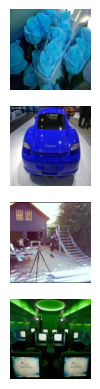

In [ ]:
import torch
import matplotlib.pyplot as plt
# exploringg some data
z = next(iter(dataloader))

for i in range (4):
  plt.subplot(4,1,i+1)
  plt.axis("off")
  plt.imshow(z[2][i].detach().numpy())

In [ ]:
# len(dataloader) * 16

17056

# Defining Denoiser and Ensembler models

In [13]:
# the ensemble model --- PLAIN ONE
import torch
from torch import nn

class EnsembleModel(nn.Module):
  """
  This model will combine the output MAT and LAMA which will be saved in the model folder
  """
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Sequential(
        nn.Conv2d(3, 32, 3, 1, 1),
        nn.LeakyReLU(),
        # nn.MaxPool2d(2),
    )
    self.conv2 = nn.Sequential(
        nn.Conv2d(3, 32, 3, 1, 1),
        nn.LeakyReLU(),
        # nn.MaxPool2d(2),
    )
    self.conv3 = nn.Sequential(
        nn.Conv2d(64, 128, 3, 1, 1),   # dependednt on output of concatenation
        nn.LeakyReLU(),
        # nn.MaxPool2d(2),
    )

    self.in_conv3 = nn.Sequential(
        nn.ConvTranspose2d(128, 64, 3, 1, 1),   # dependednt on output of concatenation
        nn.LeakyReLU(),

        nn.ConvTranspose2d(64, 32, 3, 1, 1),   # dependednt on output of concatenation
        nn.LeakyReLU(),

        nn.ConvTranspose2d(32, 3, 3, 1, 1),   # dependednt on output of concatenation
        nn.LeakyReLU(),
    )


  def forward(self, img1, img2):
    x = self.conv1(img1)
    y = self.conv2(img2)
    z = torch.cat((x, y), dim=1)
    z = self.conv3(z)
    z = self.in_conv3(z)
    return z


In [14]:
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class ConvDenoiser(nn.Module):
    def __init__(self):
        super(ConvDenoiser, self).__init__()
        ## encoder layers ##
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)  # Conv layer (3 --> 32 channels)
        self.conv2 = nn.Conv2d(32, 16, 3, padding=1)  # Conv layer (32 --> 16 channels)
        self.conv3 = nn.Conv2d(16, 8, 3, padding=1)  # Conv layer (16 --> 8 channels)

        ## decoder layers ##
        # Transpose layers to upsample back to the original input size
        self.t_conv1 = nn.ConvTranspose2d(8, 16, 3, padding=1)  # upsample by stride 1, no change in spatial dim
        self.t_conv2 = nn.ConvTranspose2d(16, 32, 3, padding=1)  # upsample by stride 1, no change in spatial dim
        self.t_conv3 = nn.ConvTranspose2d(32, 3, 3, padding=1)  # Output back to 3 channels

    def forward(self, x):
        ## encode ##
        x = F.leaky_relu(self.conv1(x))  # First conv layer
        x = F.leaky_relu(self.conv2(x))  # Second conv layer
        x = F.leaky_relu(self.conv3(x))  # Third conv layer

        ## decode ##
        x = F.leaky_relu(self.t_conv1(x))  # First transpose conv
        x = F.leaky_relu(self.t_conv2(x))  # Second transpose conv
        x = torch.sigmoid(self.t_conv3(x))  # Output layer with sigmoid activation

        return x

# Instantiate the model
denoise = ConvDenoiser()


In [ ]:
from torchinfo import summary
import torch
# Create an input tensor with the correct dimensions
input_tensor = torch.randn(16, 3, 256, 256)

# Pass the input tensor to denoise()
out = denoise(input_tensor)
out.shape

torch.Size([16, 3, 256, 256])

In [15]:

from loguru import logger

logger.add("app.log")
logger.info("This will be logged to the file.")


2025-10-27 12:58:58.880 | INFO     | __main__:<cell line: 0>:4 - This will be logged to the file.


# Loading the models

In [16]:
model = torch.load("till_now_best_unet.pth", weights_only=False)
denoising_model = torch.load('till_now_best_denosingin_final.pth', weights_only=False)
denoising_model_lama = torch.load("till_now_best_denoising_lama.pth", weights_only=False)


In [17]:
device = 'cuda' if torch.cuda.is_available else "cpu"

# Testing

In [18]:
import lpips
from tqdm import tqdm
import numpy as np
from torchmetrics.image import StructuralSimilarityIndexMeasure
from torchmetrics.image.fid import FrechetInceptionDistance
import os
import torch
from torchvision.utils import save_image

# Move models to device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
denoising_model.to(device)
denoising_model_lama.to(device)
model.to(device)

# Lists for saving low-SSIM cases
final_list_0, final_list_1, final_list_2, final_list_3, final_list_4 = [], [], [], [], []


def eval_model(model_, device, test_dataloader, out_dir):
    metric_fn = lpips.LPIPS(net='alex').to(device)
    model_ = model_.to(device)
    model_.eval()

    ssim = StructuralSimilarityIndexMeasure(data_range=1.0).to(device)
    fid = FrechetInceptionDistance().to(device)  # ✅ correct FID use

    metric_list, ssim_metric_list = [], []

    if not os.path.exists(out_dir):
        os.makedirs(out_dir)

    with tqdm(total=len(test_dataloader), unit_scale=True,
              postfix={'lpips': 0.0, 'ssim': 0.0, 'fid': 0.0}, ncols=150) as pbar:
        for i, (img, lama, mat) in enumerate(test_dataloader):
            img = img.permute(0, 3, 1, 2).float().to(device)
            lama = lama.permute(0, 3, 1, 2).float().to(device)
            mat = mat.permute(0, 3, 1, 2).float().to(device)
            gt_image = img

            with torch.no_grad():
                lama = denoising_model_lama(lama)
                image_reconstructed = denoising_model(model_(lama, mat)) * 255.0  # your scaling kept

            # Save images
            for j in range(image_reconstructed.shape[0]):
                save_image(image_reconstructed[j], f"{out_dir}/{(2*i)+j}.jpg")

            # SSIM
            ssim_val = ssim(image_reconstructed / 255.0, gt_image / 255.0).item()
            ssim_metric_list.append(ssim_val)

            # ✅ Correct FID usage: update across dataset, compute at the end
            fid.update(image_reconstructed.clamp(0, 255).byte(), real=False)
            fid.update(gt_image.clamp(0, 255).byte(), real=True)

            # LPIPS (unchanged as you requested)
            lpips_val = torch.mean(metric_fn(gt_image, image_reconstructed)).item()
            metric_list.append(lpips_val)

            # Save poor cases
            if ssim_val < 0.6:
                final_list_0.append(img)
                final_list_1.append(lama)
                final_list_2.append(mat)
                final_list_3.append(ssim_val)
                final_list_4.append(image_reconstructed)

            pbar.set_postfix({
                'lpips': np.mean(metric_list),
                'ssim': np.mean(ssim_metric_list)
            })
            pbar.update(1)

    # ✅ Compute FID once at the end
    fid_mean = fid.compute().item()

    print('\nLPIPS mean:', np.mean(metric_list))
    print('LPIPS std:', np.std(metric_list))
    print('SSIM mean:', np.mean(ssim_metric_list))
    print('SSIM std:', np.std(ssim_metric_list))
    print('FID mean:', fid_mean)

    return metric_list, ssim_metric_list, fid_mean


# Example run
metric_list, ssim_metric_list, fid_mean = eval_model(model, device, dataloader, "outputs")

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:01<00:00, 184MB/s]


Loading model from: /usr/local/lib/python3.12/dist-packages/lpips/weights/v0.1/alex.pth


Downloading: "https://github.com/toshas/torch-fidelity/releases/download/v0.2.0/weights-inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/weights-inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:00<00:00, 364MB/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 9.11k/9.11k [20:19<00:00, 7.47it/s, lpips=0.0129, ssim=0.976]



LPIPS mean: 0.01294308350497786
LPIPS std: 0.005120672759779451
SSIM mean: 0.9764398374506177
SSIM std: 0.006737049941535363
FID mean: 0.9881818294525146


In [19]:
metric_list, ssim_metric_list

([0.015669716522097588,
  0.012367086485028267,
  0.011255739256739616,
  0.021633770316839218,
  0.01799584925174713,
  0.012325103394687176,
  0.01330496184527874,
  0.01146557368338108,
  0.010969815775752068,
  0.014482692815363407,
  0.011761996895074844,
  0.010965021327137947,
  0.013306723907589912,
  0.009677141904830933,
  0.021511346101760864,
  0.01040360052138567,
  0.011740433052182198,
  0.01875125989317894,
  0.02076162025332451,
  0.019911695271730423,
  0.00960724800825119,
  0.009448591619729996,
  0.01527935080230236,
  0.010820265859365463,
  0.020946592092514038,
  0.011928199790418148,
  0.014298297464847565,
  0.010036630555987358,
  0.008879703469574451,
  0.009351213462650776,
  0.013034547679126263,
  0.014585575088858604,
  0.008360004052519798,
  0.015013414435088634,
  0.009088065475225449,
  0.010274061933159828,
  0.009478791616857052,
  0.024285010993480682,
  0.01563839428126812,
  0.009023535996675491,
  0.009823443368077278,
  0.012199965305626392,
 

In [ ]:
_______________________________________________________________________MAIN PART --------------------------------------------------------------------------------------------

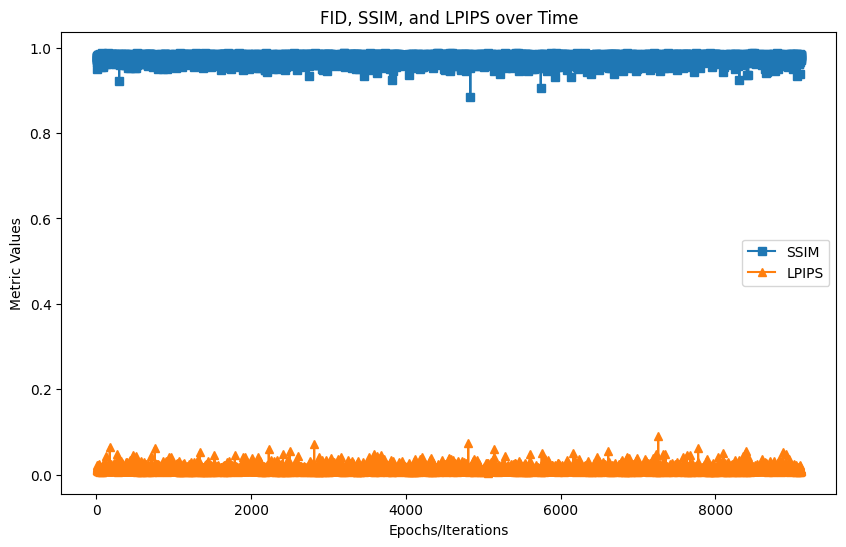

In [20]:
# plotting the losses
import matplotlib.pyplot as plt

# Example data
ssim_values = ssim_metric_list
lpips_values = metric_list

# X-axis values (e.g., epochs or iteration numbers)
x_values = list(range(1, len(ssim_values) + 1))

# Create a figure and axis
plt.figure(figsize=(10, 6))


# Plot SSIM values
plt.plot(x_values, ssim_values, label='SSIM', marker='s')

# Plot LPIPS values
plt.plot(x_values, lpips_values, label='LPIPS', marker='^')

# Add labels and title
plt.xlabel('Epochs/Iterations')
plt.ylabel('Metric Values')
plt.title('FID, SSIM, and LPIPS over Time')

# Add a legend
plt.legend()

# Show the plot
plt.show()


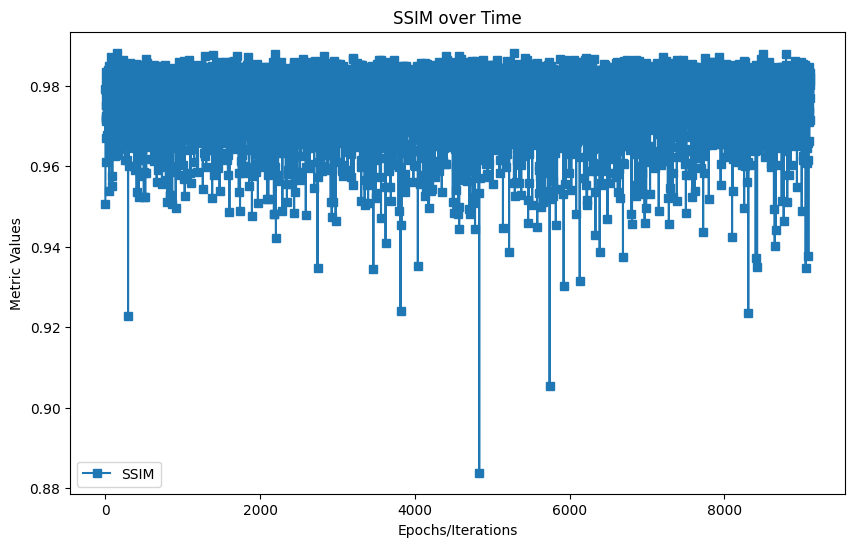

In [21]:
# plotting the losses
import matplotlib.pyplot as plt

# Example data
ssim_values = ssim_metric_list

# X-axis values (e.g., epochs or iteration numbers)
x_values = list(range(1, len(ssim_values) + 1))

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot SSIM values
plt.plot(x_values, ssim_values, label='SSIM', marker='s')

# Add labels and title
plt.xlabel('Epochs/Iterations')
plt.ylabel('Metric Values')
plt.title('SSIM over Time')

# Add a legend
plt.legend()

# Show the plot
plt.show()
